In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../input/flavors_of_cacao.csv")


In [3]:
print(data.shape)
print(data.head())
print(data.columns.values)

(1795, 9)
  Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   
3                   A. Morin                             Akata  1680   
4                   A. Morin                            Quilla  1704   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France    3.75              
1          2015            70%            France    2.75              
2          2015            70%            France    3.00              
3          2015            70%            France    3.50              
4          2015            70%            France    3.50              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4              

In [4]:
data.columns =data.columns.str.replace('\n', ' ').str.replace('\xa0', '')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company (Maker-if known)            1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null object
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1794 non-null object
Broad Bean Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
None


In [5]:
#print(data.isnull().sum())
data.fillna(0,inplace=True)
print(data.isnull().sum())

Company (Maker-if known)            0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
dtype: int64


In [6]:
data['Cocoa Percent']=data['Cocoa Percent'].apply(lambda x: x[:-1]).astype('float')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company (Maker-if known)            1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null float64
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1795 non-null object
Broad Bean Origin                   1795 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


                    REF  Review Date  Cocoa Percent    Rating
REF            1.000000     0.985076       0.037791  0.101030
Review Date    0.985076     1.000000       0.038177  0.099846
Cocoa Percent  0.037791     0.038177       1.000000 -0.164820
Rating         0.101030     0.099846      -0.164820  1.000000


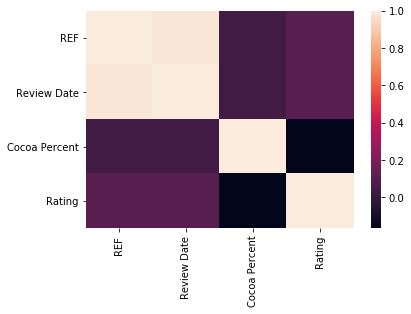

In [8]:
print(data.corr())

sns.heatmap(data.corr())

In [9]:
data.columns.values

array(['Company (Maker-if known)', 'Specific Bean Origin or Bar Name',
       'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'], dtype=object)

5.00      2
1.75      3
1.00      4
1.50     10
2.25     14
2.00     32
4.00     98
2.50    127
3.75    210
2.75    259
3.25    303
3.00    341
3.50    392
Name: Rating, dtype: int64


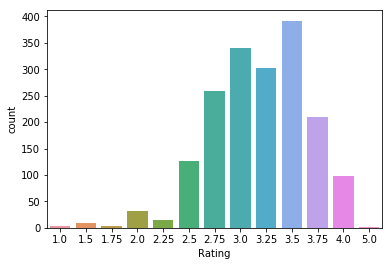

In [10]:
print(data['Rating'].value_counts().sort_values(ascending=True))
sns.countplot(x ='Rating', data=data)

Broad Bean Origin
Guat., D.R., Peru, Mad., PNG    4.00
Ven, Bolivia, D.R.              4.00
Peru, Dom. Rep                  4.00
Dom. Rep., Madagascar           4.00
Venezuela, Java                 4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Venez,Africa,Brasil,Peru,Mex    3.75
Dominican Rep., Bali            3.75
Ven.,Ecu.,Peru,Nic.             3.75
PNG, Vanuatu, Mad               3.75
Name: Rating, dtype: float64


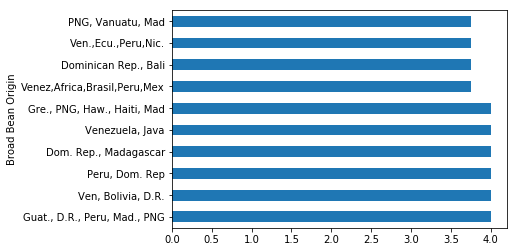

In [11]:
rating_BroadBeanOrigin_median = data.groupby(["Broad Bean Origin"])['Rating'].median()
print(rating_BroadBeanOrigin_median.sort_values(ascending=False).head(10))
rating_BroadBeanOrigin_median.sort_values(ascending=False).head(10).plot('barh')

Company (Maker-if known)
Tobago Estate (Pralus)                  4.000
Patric                                  3.875
Matale                                  3.875
Ocelot                                  3.875
Heirloom Cacao Preservation (Zokoko)    3.875
Terroir                                 3.750
Askinosie                               3.750
Un Dimanche A Paris                     3.750
Obolo                                   3.750
Timo A. Meyer                           3.750
Name: Rating, dtype: float64


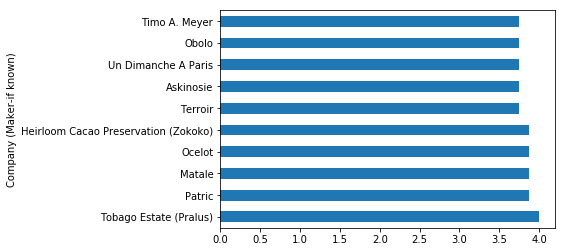

In [12]:
rating_company_median= data.groupby(["Company (Maker-if known)"])['Rating'].median()
print(rating_company_median.sort_values(ascending=False).head(10))
rating_company_median.sort_values(ascending=False).head(10).plot('barh')

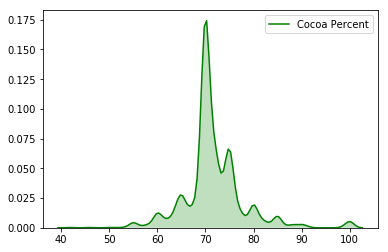

In [13]:
sns.kdeplot(data["Cocoa Percent"],color="green", shade=True)


5.0


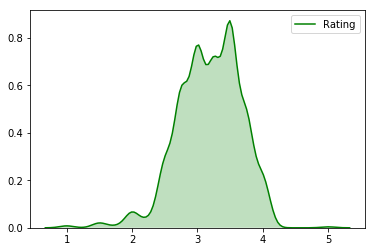

In [14]:
sns.kdeplot(data["Rating"],color="green", shade=True)
print(data['Rating'].max())

1952


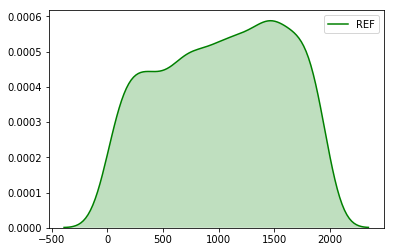

In [15]:
sns.kdeplot(data["REF"],color="green", shade=True)
print(data['REF'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company (Maker-if known)            1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null float64
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1795 non-null object
Broad Bean Origin                   1795 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB
None


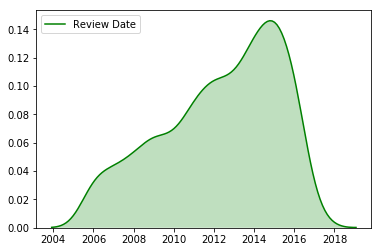

In [16]:
print(data.info())
sns.kdeplot(data["Review Date"],color="green", shade=True)